# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1: Eran Bolandian 203606736 eranbolan91@gmail.com

# Details Student 2:


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [22]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [23]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [24]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [25]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [26]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [27]:
# Hebrew tokenizer import:

# unmark if you want to use:
# import hebrew_tokenizer as ht

In [28]:
def display_graph_bar(df_train_gender):
    m_count = 0
    f_count = 0
    for index, gender in df_train_gender.items():
        if gender.lower() == "m":
            m_count += 1
        else:
            f_count += 1

    plt.figure(figsize=(20, 10))
    plt.bar(["M", "F"],[m_count, f_count] , alpha=0.5)
    plt.xlabel('Gender',fontsize=20)
    plt.ylabel('Sum of genders', fontsize=20)
    plt.title('Men vs. Female', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()
    

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [29]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [30]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [31]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

## Creating model without cleaning the data

In [32]:
X = df_train['story']
y = df_train['gender']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = MultinomialNB()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_train)
nb.fit(X,y_train)

X_test_transformed = vectorizer.transform(X_test)

# Predict the labels for the testing data
y_pred = nb.predict(X_test_transformed)
f1 = f1_score(y_test, y_pred, average='macro')
# We can see that this model is only 0.43 accurate. This is not a good model.
print(f1)

MultinomialNB()

0.43018867924528303


<h5>As we can see, we got 0.43 accurate which is not good</h5>
<p>Lets clean the data from numbers, special characters and words that are not hebrew</p>

In [33]:
for index, row in df_train.iterrows():    
    df_train.at[index, 'story'] = re.sub(r'[^א-ת\s]', '',row['story'])

### Now lets check if our data is balance between Men and Female

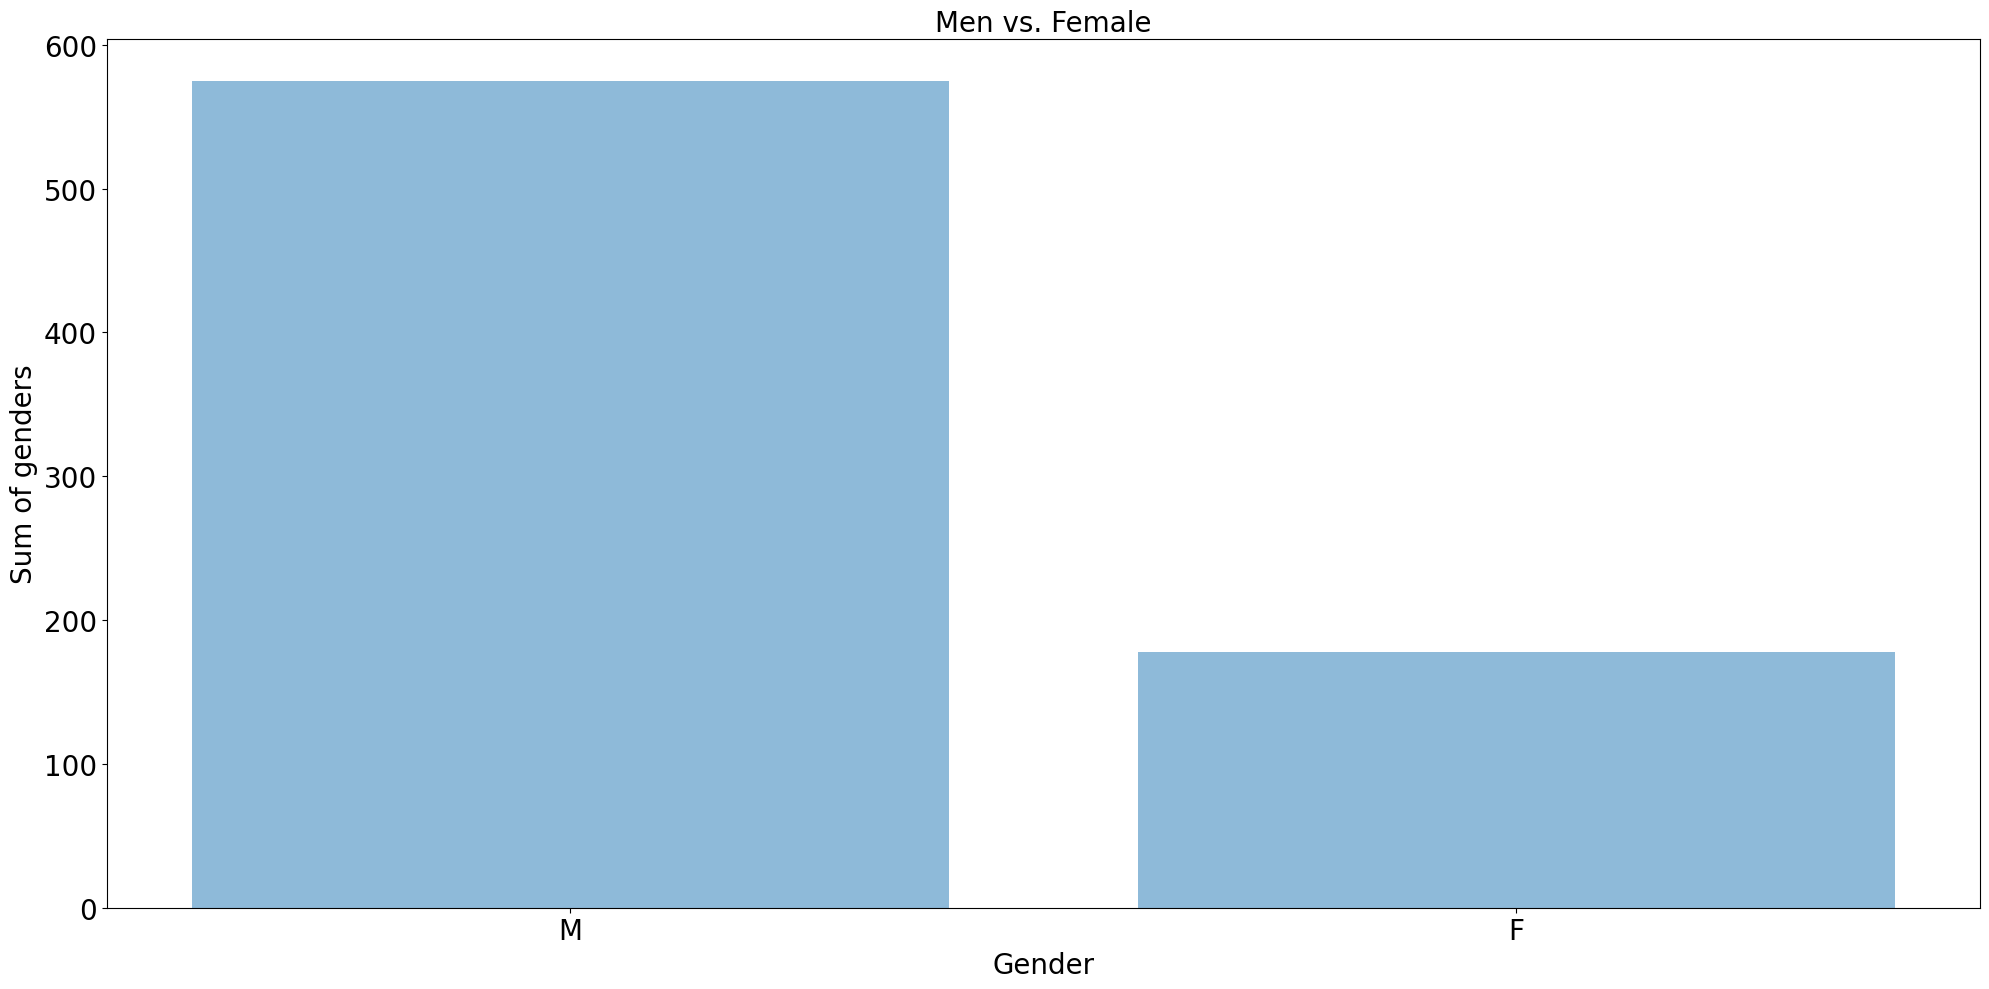

In [34]:
display_graph_bar(df_train['gender'])


<h3> As we can see, our data is not balanced </h3>
<h5> Let's balance it </h5>

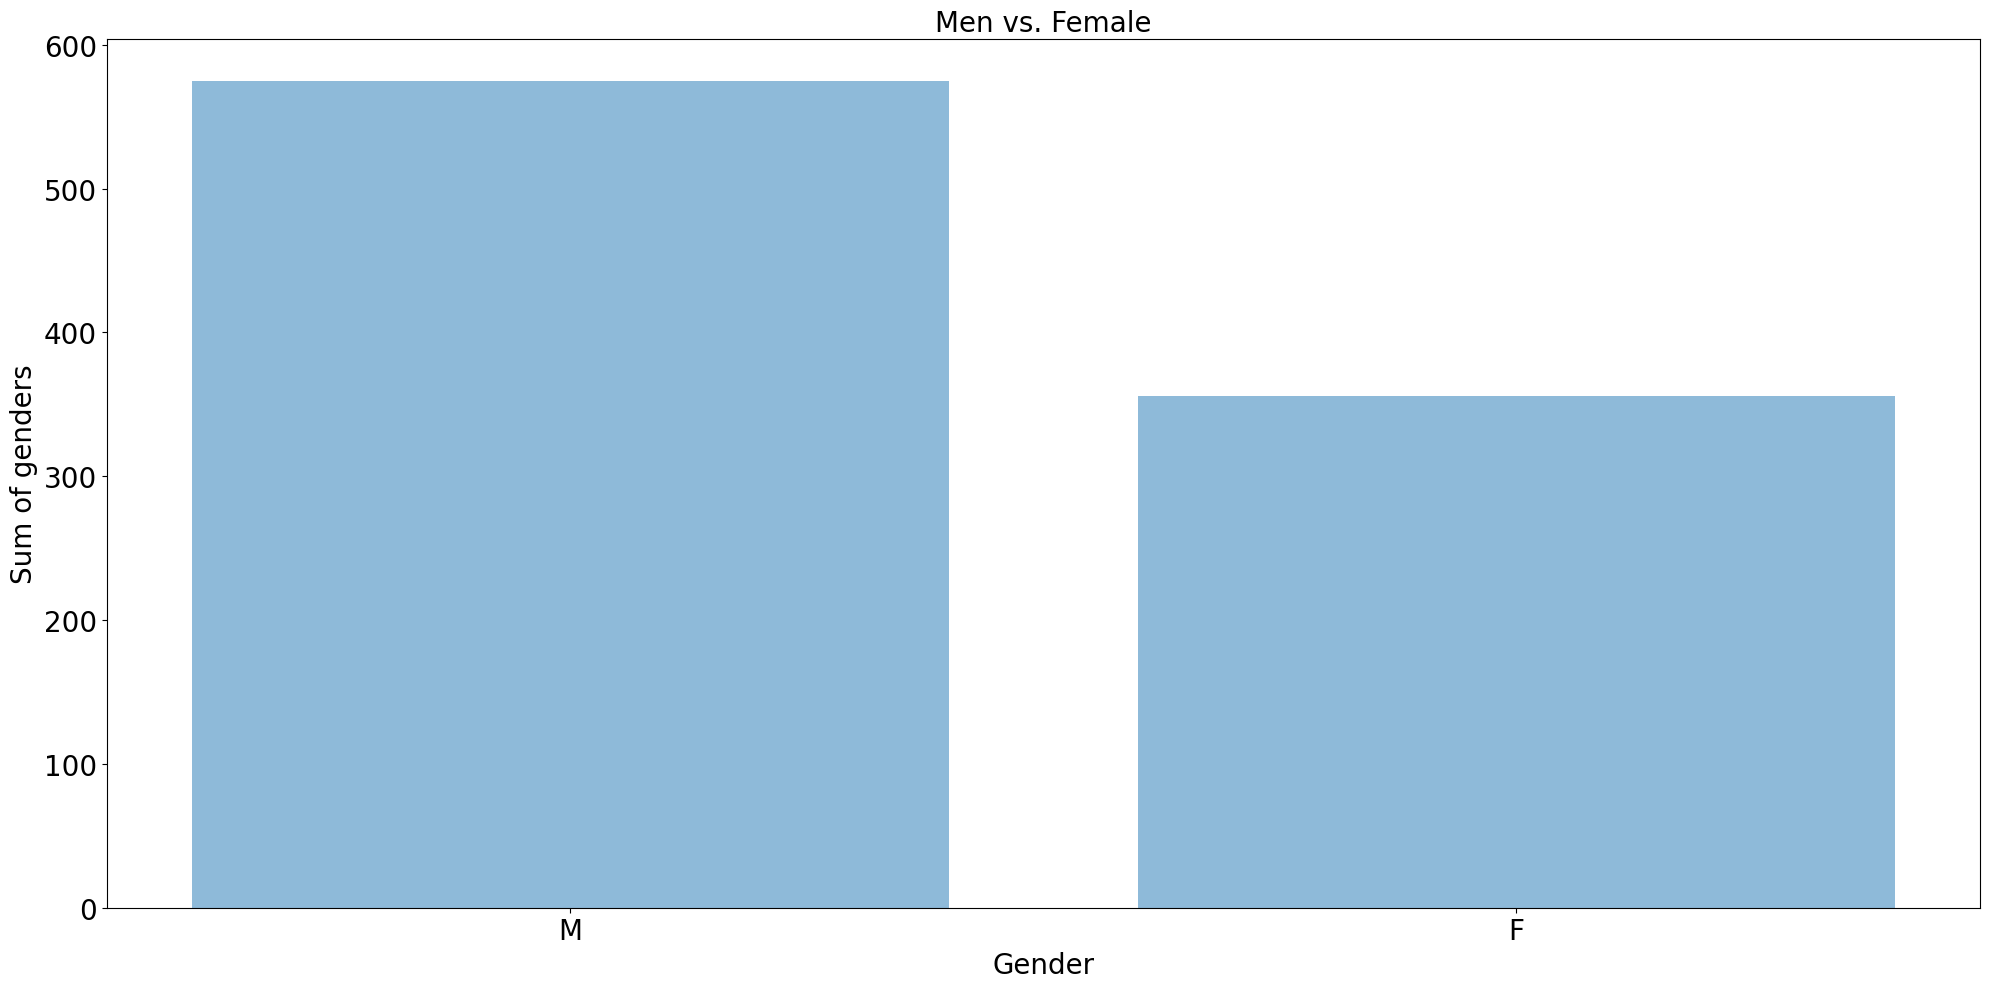

In [35]:
# Duplicating female rows
female_rows = df_train[df_train['gender'] == 'f']
df_train = pd.concat([df_train, female_rows])

display_graph_bar(df_train['gender'])



<h4> Still not balanced, lets add more 100 random rows </h4>

In [36]:
female_rows = df_train[df_train['gender'] == 'f']
randomly_selected_female_rows = female_rows.sample(n=100)
df_train = pd.concat([df_train, randomly_selected_female_rows])


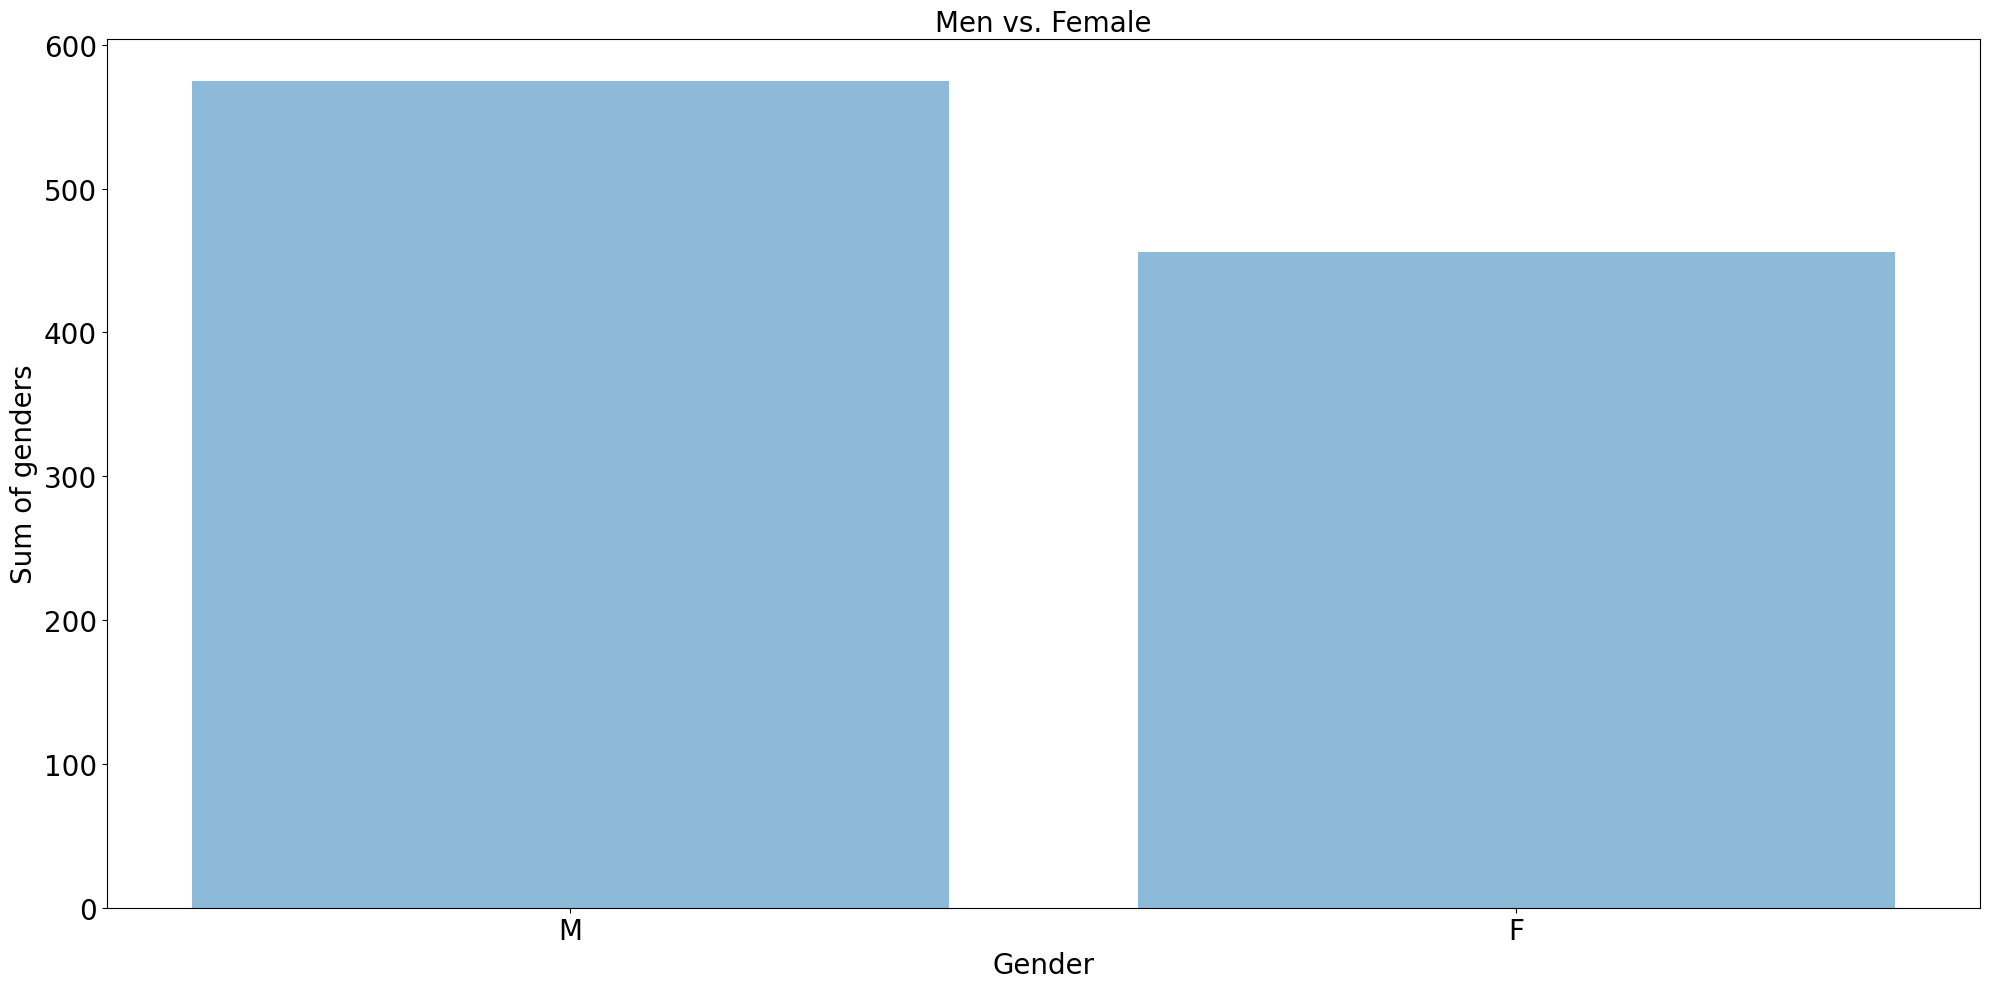

In [37]:
display_graph_bar(df_train['gender'])

<h3> Now our data is balanced! </h3>
<h5>Now lets map the column gender. M = 1, F = 0 </h5>

In [38]:
gender_mapping = {"m":1, "f":0}
df_train['gender'] = df_train['gender'].replace(gender_mapping)

<h4> Splitting and training the data </h4>

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_train['story'], df_train['gender'], test_size=0.2, random_state=42)

<h4> After we cleaned our data and mapped the 'gender' column. </h4>
<h5>Now we will check which model will give us the highest prediction percentages </h5>


In [40]:
def get_f1_from_model(model, vectorizer, normalize, params):
    pipeline = Pipeline([('vec', vectorizer),('norm', normalize) ,('model', model)])
    grid_search = GridSearchCV(pipeline, params, cv=10, verbose=False, n_jobs=-1, scoring="f1_macro")
    grid_search.fit(X_train, y_train)
    f1_score_mean = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=10, scoring="f1_macro").mean()
    return f1_score_mean, grid_search.best_estimator_

In [41]:
models_f1_scores = {} # models f1 scores dict
models = {} # models dict

nb_params = {
    'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'model__fit_prior': [True, False],
    'model__class_prior': [None, [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]],
    'vec__max_features': [1500],
    'vec__ngram_range': [(1, 3)]
    }

tree_params = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'vec__max_features': [1500],
    'vec__ngram_range': [(1, 3)]
    }

svc_params = {
    'model__C': [0.1, 1, 10],
    'model__penalty': ['l1', 'l2'], 
    'vec__max_features': [1500],
    'vec__ngram_range': [(1, 3)]
    }

knn_params = {
    'model__n_neighbors': [3, 5, 7, 10],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'vec__max_features': [1500],
    'vec__ngram_range': [(1, 3)]
    }


models_dict = {
    'nb': {'model':MultinomialNB(),'vec': CountVectorizer(), "norm":preprocessing.Normalizer(norm='l1'), 'params':nb_params},
    'tree':{"model":DecisionTreeClassifier(), "vec":CountVectorizer(), "norm":preprocessing.Normalizer(norm='l1'), 'params':tree_params},
    'knn':{"model":KNeighborsClassifier(), "vec":CountVectorizer(), "norm":preprocessing.Normalizer(norm='l1'), 'params':knn_params},
    'svc':{"model":LinearSVC(), "vec":CountVectorizer(), "norm":preprocessing.Normalizer(norm='l1'),'params':svc_params}
    }

for model_name, model_params in models_dict.items():
    f1 , model_best_est = get_f1_from_model(model_params['model'], model_params['vec'], model_params['norm'], model_params['params'])
    models_f1_scores[model_name] = f1
    models[model_name] = model_best_est

print(models_f1_scores)
print(models)

/home/eran-bolandian/HIT/Machine Learning/.venv/lib/python3.11/site-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/home/eran-bolandian/HIT/Machine Learning/.venv/lib/python3.11/site-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/home/eran-bolandian/HIT/Machine Learning/.venv/lib/python3.11/site-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/home/eran-bolandian/HIT/Machine Learning/.venv/lib/python3.11/site-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/home/eran-b

{'nb': 0.791524568493375, 'tree': 0.8165716988861134, 'knn': 0.8370657075220403, 'svc': 0.7598243941902414}
{'nb': Pipeline(steps=[('vec', CountVectorizer(max_features=1500, ngram_range=(1, 3))),
                ('norm', Normalizer(norm='l1')),
                ('model', MultinomialNB(alpha=0.01, fit_prior=False))]), 'tree': Pipeline(steps=[('vec', CountVectorizer(max_features=1500, ngram_range=(1, 3))),
                ('norm', Normalizer(norm='l1')),
                ('model', DecisionTreeClassifier(criterion='entropy'))]), 'knn': Pipeline(steps=[('vec', CountVectorizer(max_features=1500, ngram_range=(1, 3))),
                ('norm', Normalizer(norm='l1')),
                ('model',
                 KNeighborsClassifier(n_neighbors=10, weights='distance'))]), 'svc': Pipeline(steps=[('vec', CountVectorizer(max_features=1500, ngram_range=(1, 3))),
                ('norm', Normalizer(norm='l1')), ('model', LinearSVC(C=10))])}


In [42]:
max_f1 = 0
best_model = ""
for model in models_f1_scores.keys():
    if max_f1 < models_f1_scores[model]:
        max_f1 = models_f1_scores[model]
        best_model = model

print("The best Model is: ", best_model, " with f1 score of: ", max_f1)

vec = models[best_model][0] # Setting the CountVectorizer
X_test = vec.transform(df_test['story']) # Transforming the test data
y_pred = models[best_model][2].predict(X_test) # Predicting the test data using the best model

df_predicted = pd.DataFrame({"test_example_id": df_test.test_example_id, "predicted_category": y_pred}) # Converting the predictions to a dataframe
gender_mapping = {1:"m", 0:"f"} 
df_predicted['predicted_category'] = df_predicted['predicted_category'].replace(gender_mapping) # mapping m = 1 and f = 0
df_predicted

The best Model is:  knn  with f1 score of:  0.8370657075220403


,test_example_id,predicted_category
0,0,f
1,1,m
2,2,f
3,3,m
4,4,f
...,...,...
318,318,m
319,319,m
320,320,f
321,321,m


<h3 class="alert alert-success">The best model is KNN with 83% accuracy </h3>

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [43]:
df_predicted.to_csv('classification_results.csv',index=False)